# Prédiction de souscription à un dépôt à terme bancaire

## Libraries

In [4]:
#your code
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Big picture

The data is related to direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe (1/0) a term deposit. This dataset provides the customer information. It includes 41188 records and 21 fields.

* What is your ML task? Describe it precisely.

In [2]:
#your code
#Classification binaire

## Get the data

* Get the data and quickly check your df (shape, columns).

In [13]:
#your code
# Assuming the data is in a CSV file named 'bank_data.csv'
df = pd.read_csv('bank.csv',delimiter =';')
#df = pd.read_csv('bank.csv',sep)

# Checking the shape of the DataFrame
print("Shape of the DataFrame:", df.shape)

# Checking the columns of the DataFrame
print("Columns of the DataFrame:", df.columns)


Shape of the DataFrame: (41188, 21)
Columns of the DataFrame: Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')


In [14]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


## Data exploration & processing

### Variables discovery

* Take time to discover all the variables. You should be able to explain it to your neighbor.

1 - "age" (numeric)

2 - "job" : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - "marital" : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - "education" (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - "default": has credit in default? (categorical: 'no','yes','unknown')

6 - "housing": has housing loan? (categorical: 'no','yes','unknown')

7 - "loan": has personal loan? (categorical: 'no','yes','unknown')

8 - "contact": contact communication type (categorical: 'cellular','telephone')

9 - "month": last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - "day_of_week": last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - "duration": last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

12 - "campaign": number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - "pdays": number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - "previous": number of contacts performed before this campaign and for this client (numeric)

15 - "poutcome": outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

16 - "emp.var.rate": employment variation rate - (numeric)

17 - "cons.price.idx": consumer price index - (numeric)

18 - "cons.conf.idx": consumer confidence index - (numeric) 

19 - "euribor3m": euribor 3 month rate - (numeric)

20 - "nr.employed": number of employees - (numeric)

### Data types

* Display the data types of the columns. Anything to notice?

In [16]:
#your code
# Displaying data types of columns
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [18]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

### Missing values

* Find if the dataset is filled with NaN values. Apply an imputing strategy if required.

In [7]:
#your code
# Check for missing values
missing_values = df.isnull().sum()

# Display columns with missing values
print("Columns with missing values:")
print(missing_values[missing_values > 0])

# Impute missing values if required
# For example, if you want to fill missing values in numeric columns with the mean
# You can use:
# df.fillna(df.mean(), inplace=True)


Columns with missing values:
Series([], dtype: int64)


### Predicted variable (target)

Reminder: "y", the target = has the client subscribed a term deposit? (binary: yes or no)

* Describe the distribution of the target (volume, share %).
* Would you say the dataset is balanced?
* By using your favorite visualization library, display a chart bar of the distribution.

Target variable distribution:
y
no     36548
yes     4640
Name: count, dtype: int64

Share percentage:
y
no     88.734583
yes    11.265417
Name: count, dtype: float64

Is the dataset balanced? No


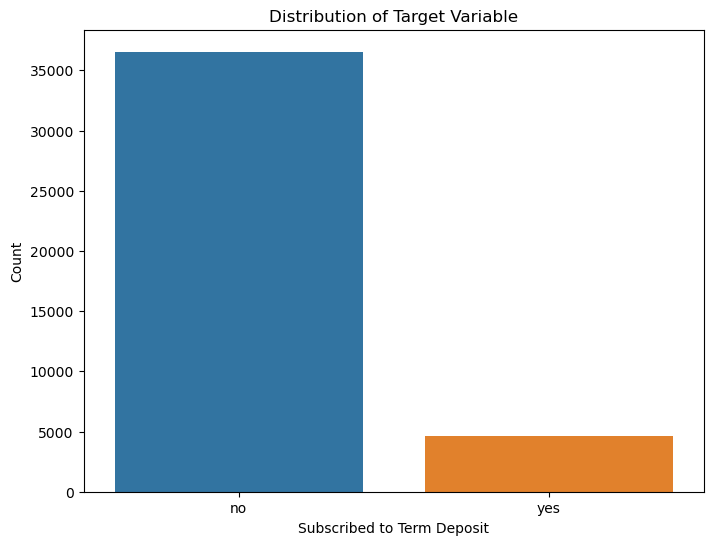

In [20]:
#your code
# Calculate volume and share percentage of each class
target_distribution = df['y'].value_counts()
total_samples = len(df)
share_percentage = target_distribution / total_samples * 100

print("Target variable distribution:")
print(target_distribution)
print("\nShare percentage:")
print(share_percentage)

# Check if the dataset is balanced
is_balanced = abs(share_percentage['no'] - share_percentage['yes']) < 5  # Adjust threshold as needed
print("\nIs the dataset balanced?", "Yes" if is_balanced else "No")

# Plotting a bar chart of the distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='y', data=df)
plt.title('Distribution of Target Variable')
plt.xlabel('Subscribed to Term Deposit')
plt.ylabel('Count')
plt.show()

* What is the average customer profile across the two classes (numerical columns only)?
* Analyze quickly each class profile.

In [22]:
#your code
# Separate data into two classes based on the target variable
yes_subscribed = df[df['y'] == 'yes']
no_subscribed = df[df['y'] == 'no']

# Calculate the average customer profile for each class (numerical columns only)
avg_profile_yes = yes_subscribed.select_dtypes(include='number').mean()
avg_profile_no = no_subscribed.select_dtypes(include='number').mean()

print("Average customer profile for those who subscribed to a term deposit:")
print(avg_profile_yes)
print("\nAverage customer profile for those who did not subscribe to a term deposit:")
print(avg_profile_no)


Average customer profile for those who subscribed to a term deposit:
age                 40.913147
duration           553.191164
campaign             2.051724
pdays              792.035560
previous             0.492672
emp.var.rate        -1.233448
cons.price.idx      93.354386
cons.conf.idx      -39.789784
euribor3m            2.123135
nr.employed       5095.115991
dtype: float64

Average customer profile for those who did not subscribe to a term deposit:
age                 39.911185
duration           220.844807
campaign             2.633085
pdays              984.113878
previous             0.132374
emp.var.rate         0.248875
cons.price.idx      93.603757
cons.conf.idx      -40.593097
euribor3m            3.811491
nr.employed       5176.166600
dtype: float64


### Other features

#### `education` column

The "education" column of the dataset has many categories, and we need to reduce the categories for a better modelling. 
* Display in a list the values of the education column.

In [23]:
#your code
# Display unique values of the education column
education_values = df['education'].unique()
print("Unique values of the education column:")
for value in education_values:
    print(value)


Unique values of the education column:
basic.4y
high.school
basic.6y
basic.9y
professional.course
unknown
university.degree
illiterate


* Find a way to group "basic.4y", "basic.9y" and "basic.6y" together and call them "basic".

In [24]:
#your code
# Replace values in the education column
df['education'] = df['education'].replace({'basic.4y': 'basic', 'basic.9y': 'basic', 'basic.6y': 'basic'})
#lamda si c'est trop compliqué
# Display unique values of the education column after grouping
education_values_grouped = df['education'].unique()
print("Unique values of the education column after grouping:")
for value in education_values_grouped:
    print(value)


Unique values of the education column after grouping:
basic
high.school
professional.course
unknown
university.degree
illiterate


#### `job` / `marital` columns

Focusing on "job" and "marital" columns:
* To get a more detailed sense of our data, plot the proportion of subscribers (or not) according to each unique value for the "job" and "marital" columns.   
* What observation would you suggest? You can do it on other columns that you might be interested in.

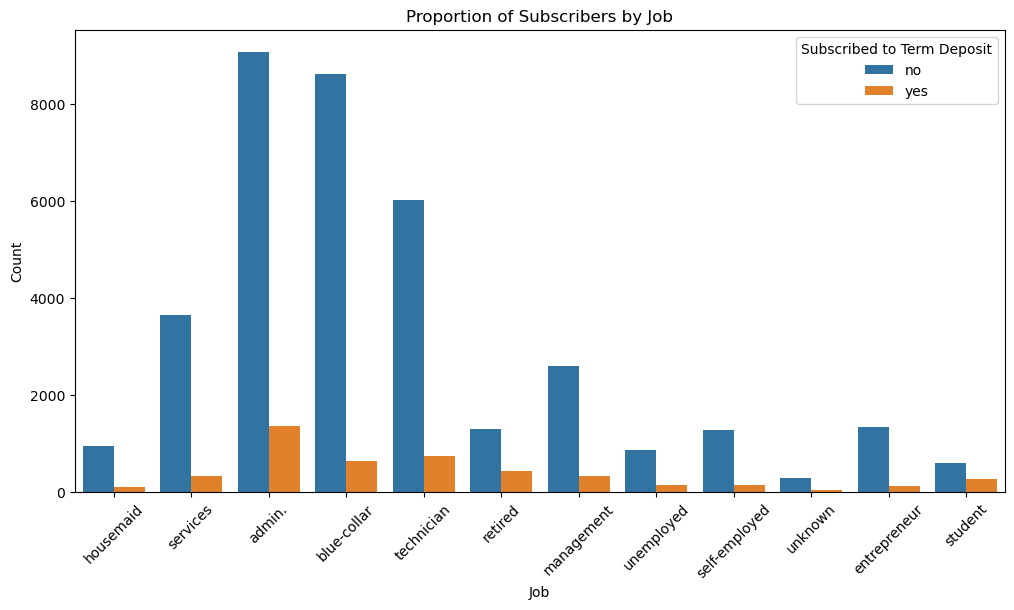

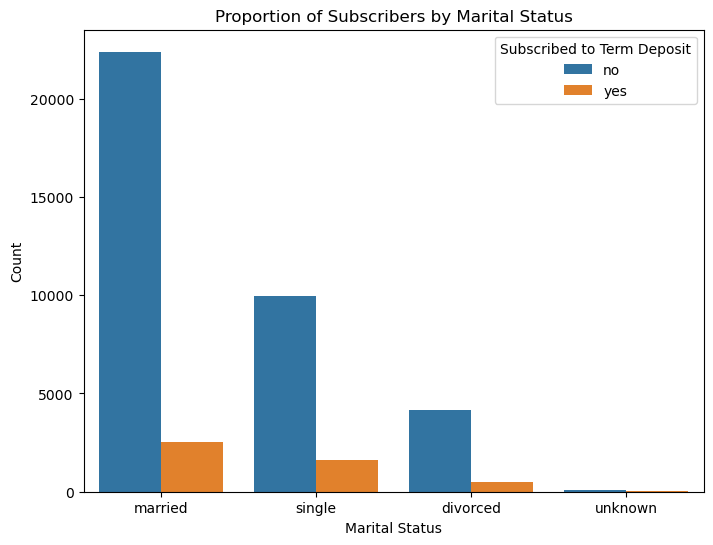

In [25]:
#your code
# Plotting proportion of subscribers by job
plt.figure(figsize=(12, 6))
sns.countplot(x='job', hue='y', data=df)
plt.title('Proportion of Subscribers by Job')
plt.xlabel('Job')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Subscribed to Term Deposit', loc='upper right')
plt.show()

# Plotting proportion of subscribers by marital status
plt.figure(figsize=(8, 6))
sns.countplot(x='marital', hue='y', data=df)
plt.title('Proportion of Subscribers by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(title='Subscribed to Term Deposit', loc='upper right')
plt.show()


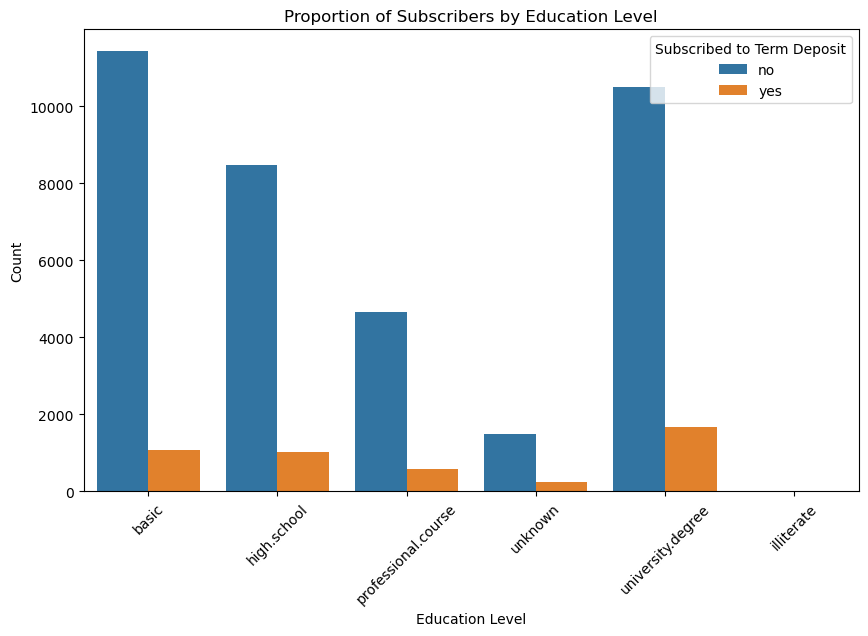

In [31]:
plt.figure(figsize=(10, 6))
sns.countplot(x='education', hue='y', data=df)
plt.title('Proportion of Subscribers by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Subscribed to Term Deposit', loc='upper right')
plt.show()


#### `age` column

* Plot the histogram of age for the customers.
* Analyze it.

C:\Users\pc\.anaconda\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


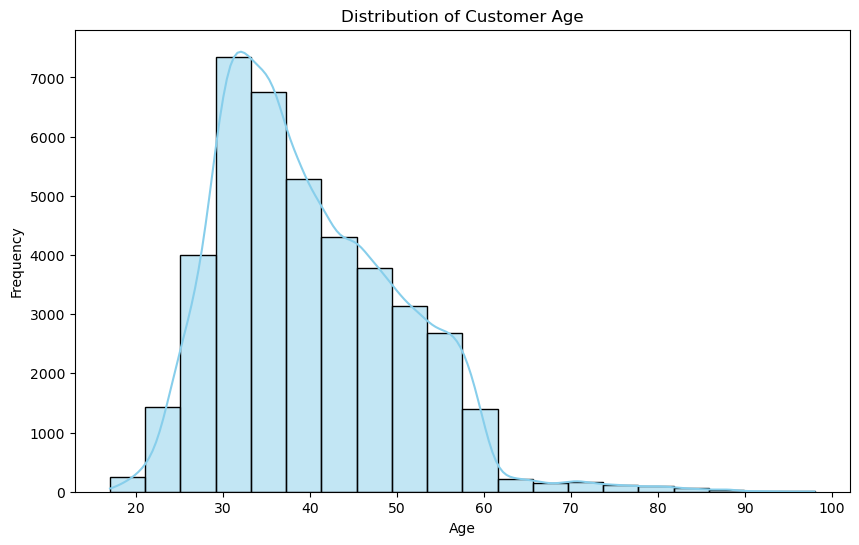

In [26]:
#your code
# Plotting histogram of age
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Customer Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


C:\Users\pc\.anaconda\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\pc\.anaconda\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


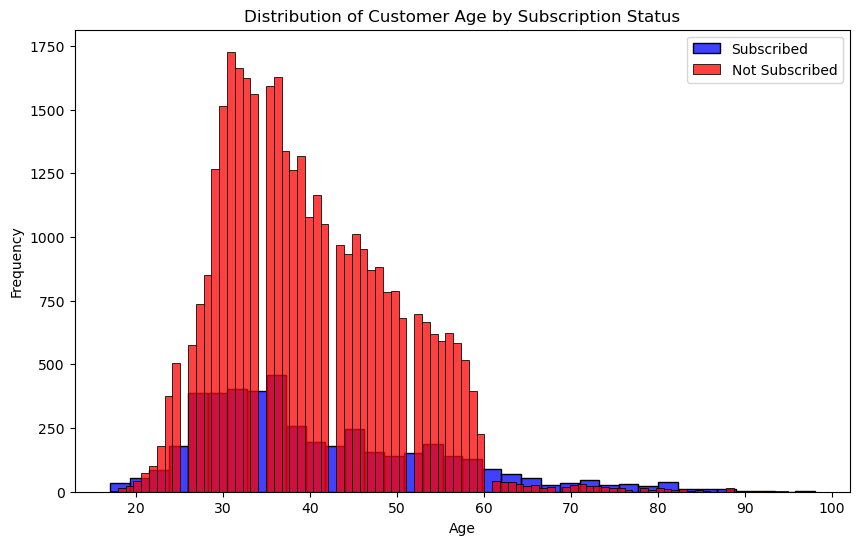

In [32]:
# Filter DataFrame for customers who have subscribed and not subscribed
subscribed_customers = df[df['y'] == 'yes']
not_subscribed_customers = df[df['y'] == 'no']

# Plot histograms of age for subscribed and not subscribed customers
plt.figure(figsize=(10, 6))
sns.histplot(subscribed_customers['age'], color='blue', label='Subscribed')
sns.histplot(not_subscribed_customers['age'], color='red', label='Not Subscribed')
plt.title('Distribution of Customer Age by Subscription Status')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()


C:\Users\pc\.anaconda\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\pc\.anaconda\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


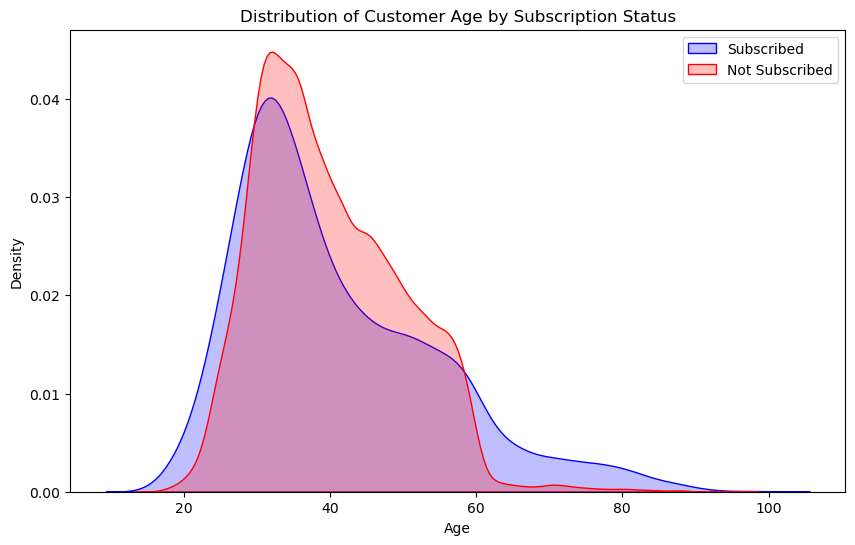

In [35]:
# Plot KDE plots of age for subscribed and not subscribed customers
plt.figure(figsize=(10, 6))
sns.kdeplot(data=subscribed_customers['age'], color='blue', label='Subscribed', fill=True)
sns.kdeplot(data=not_subscribed_customers['age'], color='red', label='Not Subscribed', fill=True)
plt.title('Distribution of Customer Age by Subscription Status')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()


### Encoding categorical variables

To run your model, you must encode your categorical variables :
* Select (smartly) your categorical variables.
* Find a way to encode them (use the 1/0 encoding). Do not forget to remove your initial columns.

In [45]:
#your code

categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

encoded_df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

encoded_df.head()



,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,False,False,True,False,False,False,True,False
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,False,False,True,False,False,False,True,False
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,False,False,True,False,False,False,True,False
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,False,False,True,False,False,False,True,False
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,False,False,True,False,False,False,True,False


In [48]:
!pip show pandas

Name: pandas
Version: 2.1.4
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: 
Author-email: The Pandas Development Team <pandas-dev@python.org>
License: BSD 3-Clause License

Copyright (c) 2008-2011, AQR Capital Management, LLC, Lambda Foundry, Inc. and PyData Development Team
All rights reserved.

Copyright (c) 2011-2023, Open source contributors.

Redistribution and use in source and binary forms, with or without
modification, are permitted provided that the following conditions are met:

* Redistributions of source code must retain the above copyright notice, this
  list of conditions and the following disclaimer.

* Redistributions in binary form must reproduce the above copyright notice,
  this list of conditions and the following disclaimer in the documentation
  and/or other materials provided with the distribution.

* Neither the name of the copyright holder nor the names of its
  contributors may be u

In [50]:
#your code

categorical_cols = df.select_dtypes(include=['object']).columns

encoded_df = pd.get_dummies(df, columns=categorical_cols, drop_first=True, dtype=int)

encoded_df.head()


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,y_yes
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,1,0,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,1,0,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,1,0,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,1,0,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,1,0,0


In [46]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [52]:
encoded_df.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'marital_unknown',
       'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_unknown', 'default_yes',
       'housing_unknown', 'housing_yes', 'loan_unknown', 'loan_yes',
       'contact_telephone', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_nonexistent', 'poutcome_success', 'y_yes'],
      dtype='object')

* Define your features X and your target y.

In [53]:
#your code
# Define features (X) and target (y)
X = encoded_df.drop('y_yes', axis=1)  # Drop the target variable from the features
y = encoded_df['y_yes']  # Target variable

# Display shapes of X and y
print("Shape of X (features):", X.shape)
print("Shape of y (target):", y.shape)


Shape of X (features): (41188, 51)
Shape of y (target): (41188,)


### Features Selection

As we have too many features (trust me 😏), we want to select only 10 variables 🔮 :
- Investigate what are the _recursive features elimination_ methods.
- Find an easy way to implement one, with 10 features selected (it might take a bit of time).
- Display in a list the selected columns.

In [56]:
#your code

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Initialize logistic regression model (you can replace it with any other estimator)
estimator = LogisticRegression()

# Initialize RFE with the estimator and desired number of features
rfe = RFE(estimator, n_features_to_select=10)
rfe.fit(X, y)

# Get selected features
selected_features = X.columns[rfe.support_]

# Display selected features
print("Selected features:")
for feature in selected_features:
    print(feature)


C:\Users\pc\.anaconda\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\pc\.anaconda\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

Selected features:
euribor3m
job_retired
job_student
month_dec
month_jul
month_mar
month_may
month_oct
poutcome_nonexistent
poutcome_success


## Logistic Regression Model Fitting

### Train & score the model

* Train a logistic regression on the selected columns. Use a test set of 20%, you may need to encode your target (if not already done).
* Score your model. Use accuracy as the metric.
* What method can you use to get a statictically stronger estimation of your model performance? Apply it.
* Does your model perform well? Think about a baseline model for this task. Build it, score it, and compare to your model score.

In [57]:
#your code
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

# Encode target variable if not already done
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y_encoded, test_size=0.2, random_state=42)

# Train logistic regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Score the model
train_accuracy = accuracy_score(y_train, log_reg.predict(X_train))
test_accuracy = accuracy_score(y_test, log_reg.predict(X_test))

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Use cross-validation for a more robust estimation of model performance
cv_scores = cross_val_score(log_reg, X[selected_features], y_encoded, cv=5, scoring='accuracy')
print("Cross-Validation Mean Accuracy:", cv_scores.mean())


Training Accuracy: 0.8992109256449166
Testing Accuracy: 0.8958485069191552
Cross-Validation Mean Accuracy: 0.8724129332755997


In [58]:
from sklearn.dummy import DummyClassifier

# Train and score the dummy classifier
dummy_clf = DummyClassifier(strategy='most_frequent')
dummy_clf.fit(X_train, y_train)
dummy_accuracy = accuracy_score(y_test, dummy_clf.predict(X_test))

print("Baseline Model (Dummy Classifier) Accuracy:", dummy_accuracy)


Baseline Model (Dummy Classifier) Accuracy: 0.8865015780529255


### Confusion Matrix & interpretation

* Display the confusion Matrix and print a classification report
* Would you say that accuracy is the best metric for the task? If not, choose another one. Again, does your model perform well?

In [59]:
#your code
from sklearn.metrics import confusion_matrix, classification_report

# Predict on the test set
y_pred = log_reg.predict(X_test)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Calculate precision, recall, and F1-score
precision = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[0, 1])
recall = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[1, 0])
f1_score = 2 * (precision * recall) / (precision + recall)

print("\nPrecision:", precision)
print("Recall:", recall)
print("F1-Score:", f1_score)


Confusion Matrix:
[[7209   94]
 [ 764  171]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7303
           1       0.65      0.18      0.28       935

    accuracy                           0.90      8238
   macro avg       0.77      0.59      0.61      8238
weighted avg       0.87      0.90      0.87      8238


Precision: 0.6452830188679245
Recall: 0.18288770053475936
F1-Score: 0.285


### Saving your csv

* Find a way to save your processed data, it may be required for later.
* **Bonus 1** : As a lazy person, you do not want to train again your fine-tuned model (it may take time). Find a way to dump it 'trained' and show that you've done it correctly.

In [60]:
import joblib

# Save processed data to CSV
processed_data_path = "processed_data.csv"
encoded_df.to_csv(processed_data_path, index=False)
print("Processed data saved successfully.")

# Save trained model
model_path = "trained_model.pkl"
joblib.dump(log_reg, model_path)
print("Trained model saved successfully.")


Processed data saved successfully.
Trained model saved successfully.


In [61]:
# Load processed data
loaded_data = pd.read_csv(processed_data_path)

# Load trained model
loaded_model = joblib.load(model_path)
